In [445]:
#installs
#!pip install xlrd
#!pip install uncertainties

In [446]:
#imports
import pandas as pd
import numpy as np
from uncertainties import unumpy as unp
from uncertainties import ufloat
from uncertainties.umath import *
import math
import scipy as sc
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import arange
from numpy.ma.core import tan
from scipy.optimize import curve_fit
import csv

In [447]:
#methods

def sinusfunct(x, a, b, phi, c):
    return (a*np.sin(2*np.pi*b*x+phi) +c)

def ekeltan(x, a):
    return np.arctan(2*a*x/(1-np.power(x,2)))-np.pi

def ekeltan2(x, a):
    return np.arctan(2*a*x/(1-np.power(x,2)))

def logreg(x, a, b, c):
  return a/(1+b*np.exp(c*x))

def quadradic(x, a, b, c):
  return a*np.power(x,2) + b*x + c

def line(x, a, b):
  return a*x + b

def schwingungDämpf(x, a, b, phi, c, d):
  return (np.exp(-d*x)*a*np.sin(2*np.pi*b*x+phi) +c)

def quatschfunktion(x, a, d):
  return a/(np.sqrt(np.power(1-np.power(x,2),2)+4*d*np.power(x,2)))

def daten_fitten(funct, x_data, y_data, genauigkeit, p): #Step4/5
    #fiten
    pars, cov = curve_fit(f=funct, xdata=x_data, ydata=y_data, p0=p, bounds=[-np.inf, np.inf], maxfev=500000)
    # Get the standard deviations of the parameters (square roots of the diagonal of the covariance)
    stdevs = np.sqrt(np.diag(cov))
    print('Fitparameter')
    print(pars)
    print('zugehörige Uncertainty')
    print(stdevs)
    #datensets
    xfit = np.linspace(min(x_data), max(x_data), genauigkeit)
    yfit = funct(xfit, *pars)
    return pars, stdevs, xfit, yfit

In [448]:
#Definitions
AB=ufloat(73.1,0.5)
BC=ufloat(121.7,0.5)
CD=ufloat(132.8,0.5)
DE=ufloat(81.3,0.5)
EF=ufloat(142.5,0.5)
FG=ufloat(193.4,0.5)
BH=ufloat(126.4,0.6)
Radius=ufloat(1.8,0.1)

d1= CD+BH+BC
d3= EF+FG-Radius
d2= DE-Radius
d1 = d1/100
d2 = d2/100
d3 = d3/100
print(d1)
print(d2)
print(d3)

3.809+/-0.009
0.795+/-0.005
3.341+/-0.007


In [449]:
#Daten einlesen
data = pd.read_excel('data.xlsx')

#converte dataframe to array
data = data.values

new_data = data[:, :3]
calibration = new_data[:24]
frequency = new_data[25:]
#data to uarray with uncertainties
ucalibration = unp.uarray(calibration[:,1], calibration[:,2])
ucalibration = np.column_stack((ucalibration, calibration[:,0]))
ufrequency = unp.uarray(frequency[:,1], frequency[:,2])
ufrequency = np.column_stack((ufrequency, frequency[:,0]))


Steigung: 0.17804323+/-0.00000016


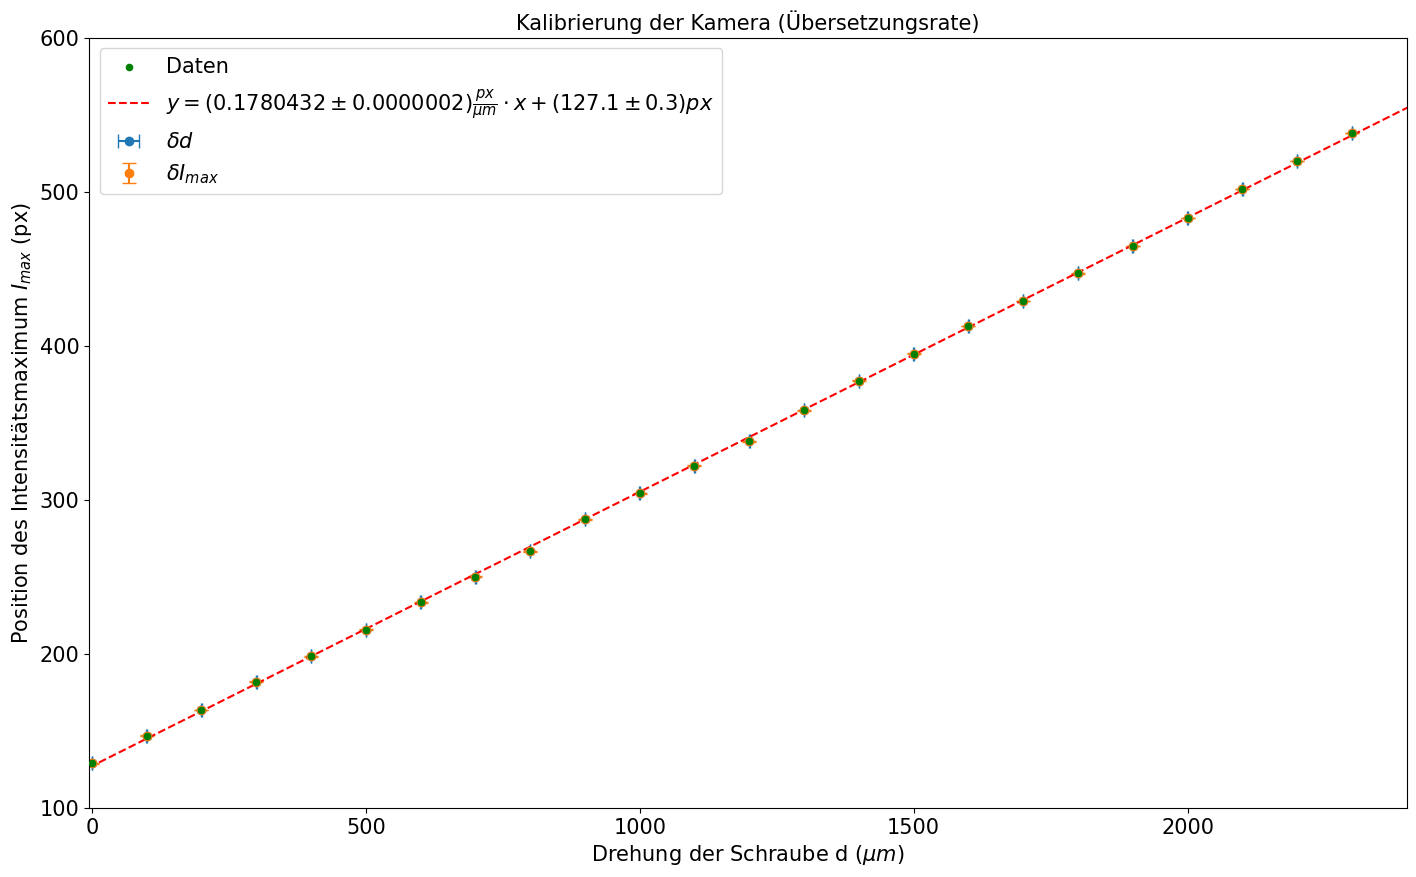

In [450]:
plt.subplots(1,1,figsize=(17, 10));
ucalibration[:,1] = ucalibration[:,1]*10
y = [float(i[0].nominal_value) for i in ucalibration]
x = [int(i[1]) for i in ucalibration]

plt.scatter(x, y, label = 'Daten', color='green', s=20, zorder= 5)

y_error = [float(i[0].std_dev) for i in ucalibration]
x_error = 0.5

plt.errorbar(x, y, xerr=x_error, fmt='o', capsize=5, label = r'$δd$')
plt.errorbar(x, y, yerr=y_error, fmt='o', capsize=5, label = r'$δI_{max}$')

popt, pcov = sc.optimize.curve_fit(line, x, y)
a, b = popt
x_line = arange(-5, 3000)
y_line = line(x_line, a, b)
perr = np.diag(pcov)
steigung = ufloat(popt[0], pcov[0][0])
Schnitt = ufloat(popt[1], pcov[1][1])

plt.plot(x_line, y_line, '--', color='red', label = r'$y = (%.7f \pm %.7f)\frac{px}{\mu m} \cdot x + (%.1f \pm %.1f)px$'%(steigung.nominal_value, steigung.std_dev, Schnitt.nominal_value, Schnitt.std_dev))
print('Steigung:', steigung)


# Add axis labels and a title
plt.xlabel(r'Drehung der Schraube d $(\mu m)$', fontsize=15)
plt.ylabel(r'Position des Intensitätsmaximum $I_{max}$ (px)', fontsize=15)
plt.title('Kalibrierung der Kamera (Übersetzungsrate)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.legend(loc = 'upper left', fontsize=15)
plt.axis([-5, 2400, 100, 600]) #Achsenanpassung
plt.show()

In [451]:
pixellänge = steigung/np.float_power(10,-6)
print(pixellänge)
print(1/steigung)

178043.23+/-0.16
5.616613+/-0.000005


Steigung: 0.026931473+/-0.000000024


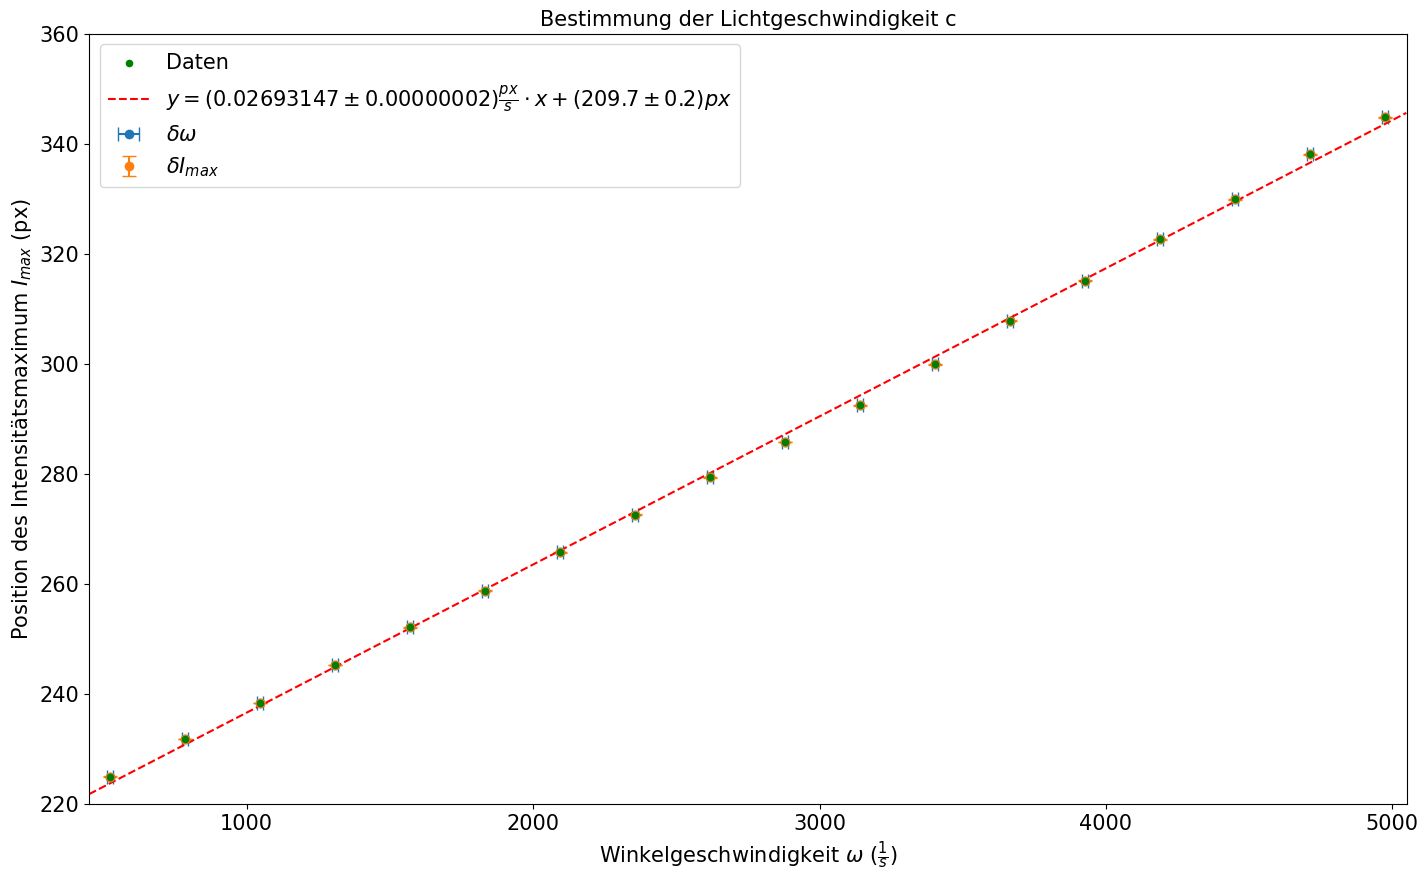

In [452]:
plt.subplots(1,1,figsize=(17, 10));
ufrequency[:,1] = ufrequency[:,1]*(np.pi/3)
y = [float(i[0].nominal_value) for i in ufrequency]
x = [int(i[1]) for i in ufrequency]

plt.scatter(x, y, label = 'Daten', color='green', s=20, zorder= 5)

y_error = [float(i[0].std_dev) for i in ufrequency]
x_error = 10

plt.errorbar(x, y, xerr=x_error, fmt='o', capsize=5, label = r'$δ\omega$')
plt.errorbar(x, y, yerr=y_error, fmt='o', capsize=5, label = r'$δI_{max}$')

popt, pcov = sc.optimize.curve_fit(line, x, y)
a, b = popt
x_line = arange(450, 5050)
y_line = line(x_line, a, b)
perr = np.diag(pcov)
steigung = ufloat(popt[0], pcov[0][0])
Schnitt = ufloat(popt[1], pcov[1][1])

plt.plot(x_line, y_line, '--', color='red', label = r'$y = (%.8f \pm %.8f)\frac{px}{s} \cdot x + (%.1f \pm %.1f)px$'%(steigung.nominal_value, steigung.std_dev, Schnitt.nominal_value, Schnitt.std_dev))
print('Steigung:', steigung)


# Add axis labels and a title
plt.xlabel(r'Winkelgeschwindigkeit $\omega$ $(\frac{1}{s})$', fontsize=15)
plt.ylabel(r'Position des Intensitätsmaximum $I_{max}$ (px)', fontsize=15)
plt.title('Bestimmung der Lichtgeschwindigkeit c', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.legend(loc = 'upper left', fontsize=15)
plt.axis([450, 5050, 220, 360]) #Achsenanpassung
plt.show()

In [453]:

c = (4*d1*np.power(d3,2)/(d2+d3))*(pixellänge/steigung)
print(c)

(2.718+/-0.010)e+08
